In [1]:
import os
import sys 
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from Implement_PCA import PCA

In [3]:
### Chọn dataset có 100 ảnh để giảm chiều ảnh
IMG_DIR = 'dataset'
images = []
images_flatten = []

total = sum(1 for entry in os.scandir(IMG_DIR) if entry.is_file())
count = 1
max_images = min(total, 100)
if max_images == 100:
    for img_path in os.listdir(IMG_DIR):
        if count == max_images + 1:
            break
        img_array = cv.imread(os.path.join(IMG_DIR,img_path), cv.IMREAD_GRAYSCALE)
        img_pil = Image.fromarray(img_array)
        img_64 = np.array(img_pil.resize((64, 64), Image.ANTIALIAS))
        images.append(img_64)
        img_array = img_64.flatten()
        images_flatten.append(img_array)
        count += 1

images_flatten = np.asarray(images_flatten).T


C:\Users\Admin\AppData\Local\Temp\ipykernel_27148\3643879239.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_64 = np.array(img_pil.resize((64, 64), Image.ANTIALIAS))


In [4]:
### Chọn số thành phần muốn giữ lại ( đã train cho 100 thành phần đầu tiên )
num_components = 90

In [9]:
### thực thi
model = PCA()
model.prj_matrix = prj_matrix = np.load(f'projection_matrix/{num_components}_components.npy')
(Xbar, mu, std) = model.standardize(images_flatten)
reconstructed_img = model.reconstruct_img(Xbar)

In [16]:
reconstructed_img[:,0].shape

(4096,)

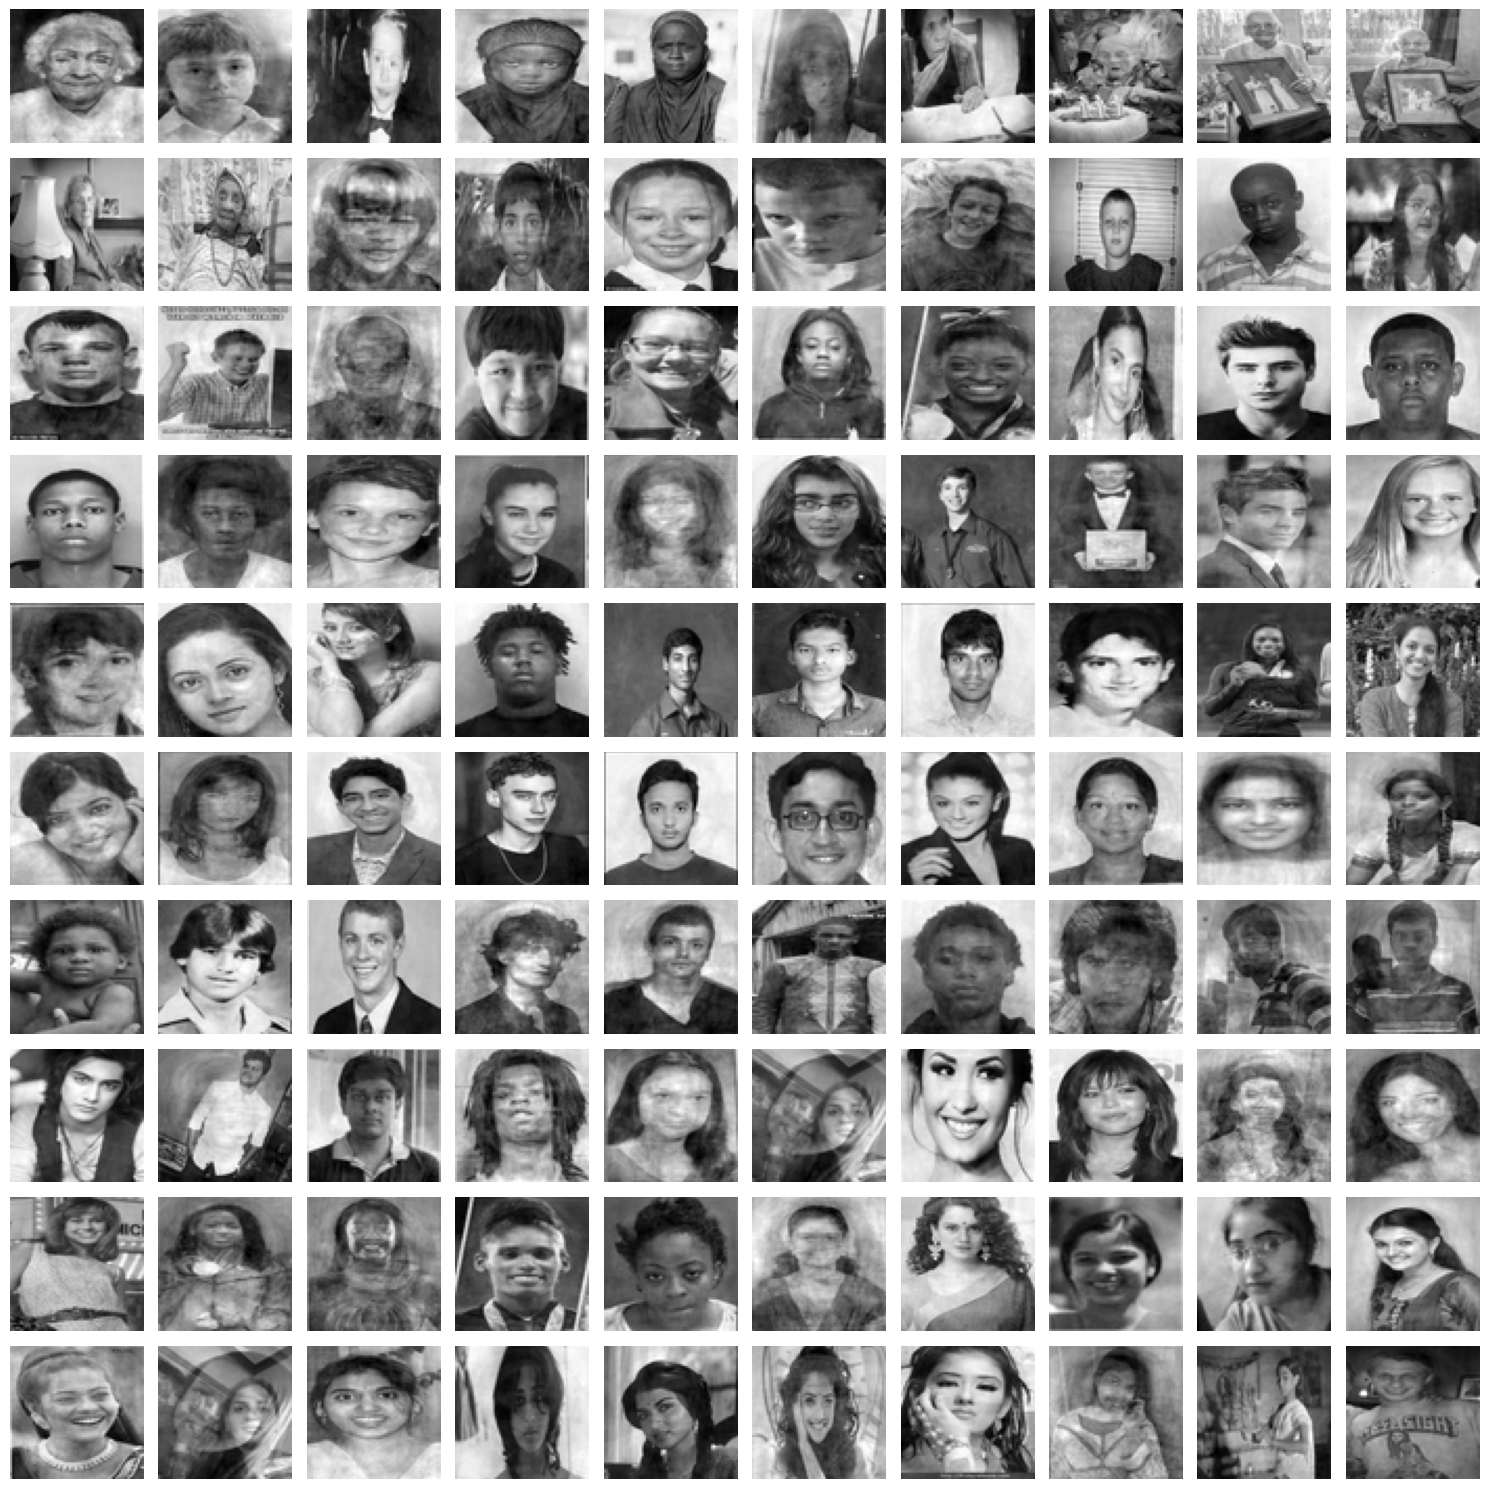

In [27]:
# Chia nhỏ reconstructed_img thành các hàng gồm 10 ảnh
num_images_per_row = 10
num_rows = reconstructed_img.shape[1] // num_images_per_row
images_per_row = np.split(reconstructed_img, num_rows, axis=1)


# Trực quan hóa từng hàng ảnh
fig, axs = plt.subplots(num_rows, num_images_per_row, figsize=(15, 15))
k = 0
for i in range(num_rows):
    for j in range(num_images_per_row):
        # Lấy ảnh từ images_per_row
        image = reconstructed_img[:,k].reshape((64, 64))
        # Vẽ ảnh lên subplot tương ứng
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].axis('off')
        k+=1

plt.tight_layout()
plt.show()